## Linear regression approach

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Nat__Gas.csv')
df.head()
df.describe()

,Prices
count,48.000000
mean,11.207083
std,0.757897
min,9.840000
25%,10.650000
50%,11.300000
75%,11.625000
max,12.800000


In [6]:
df['Dates'] =  pd.to_datetime(df.Dates, format='%m/%d/%y')
df['Year'] = df['Dates'].dt.year
df['Month'] = df['Dates'].dt.month

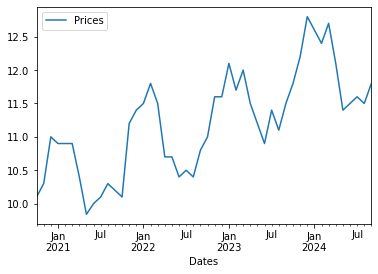

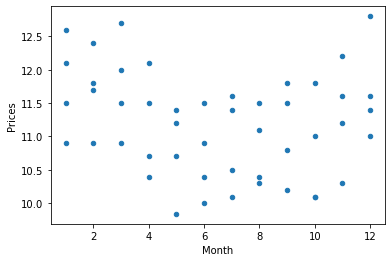

In [7]:
ax, ax_2 = df.plot.line(x='Dates', y='Prices'), df.plot.scatter(x='Month', y='Prices')

In [8]:
import statsmodels.formula.api as smf

In [9]:
df.dtypes

Dates     datetime64[ns]
Prices           float64
Year               int64
Month              int64
dtype: object

In [10]:
df['Prices_int'] = df['Prices'].astype(int)

In [11]:
reg1 = smf.ols(formula=" Prices_int ~ Year + Month", data=df).fit()

In [12]:
y_pred = reg1.predict()

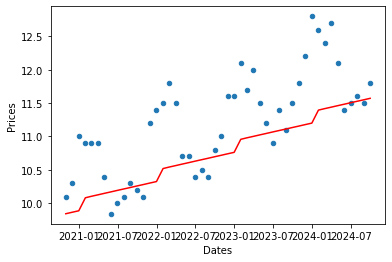

In [24]:
ak = df.plot.scatter(x='Dates', y='Prices')
plt.plot(df['Dates'], y_pred, color='red', label='Regression')

In [14]:
reg1.params

Intercept   -874.266196
Year           0.437568
Month          0.022078
dtype: float64

In [15]:
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Prices_int   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     19.24
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           9.14e-07
Time:                        22:08:25   Log-Likelihood:                -39.468
No. Observations:                  48   AIC:                             84.94
Df Residuals:                      45   BIC:                             90.55
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -874.2662    143.908     -6.075      0.000   -1164.112    -584.421
Year           0.4376      0.071      6.151      0.000       0.294       0.581
Month          0.0221      0.025      0.894      0.376      -0.028       0.072
==============================================================================
Omnibus:                        1.321   Durbin-Watson:                   1.040
Prob(Omnibus):                  0.517   Jarque-Bera (JB):                1.082
Skew:                           0.137   Prob(JB):                        0.582
Kurtosis:                       2.318   Cond. No.                     3.55e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
reg1.predict(pd.DataFrame({'Year': [2025], 'Month': [11]}))

0    12.052665
dtype: float64

In [17]:
from datetime import datetime 
import datetime as dt
from dateutil.parser import parse

In [20]:
def get_price_estimate(date):
    if type(date) != str:
        print ("Please follow the convetion Year - Month - Day and input the date within quotation marks ")
    else:
        year = parse(date).year
        month = parse(date).month
        return reg1.predict(pd.DataFrame({'Year': [year], 'Month': [month]}))

## Price Prediction by using simple linear regression

In [25]:
get_price_estimate('2025-12-30') 

0    12.074743
dtype: float64